## **Chapter 2: STATISTICAL LEARNING**
Code Sources:
* [GITHUB - junyanyao](https://github.com/junyanyao/ISLR_Python/blob/master/Ch2%20Statistical%20Learning%20Lab.ipynb
)
* [GITHUB - qx0731](https://github.com/qx0731/Sharing_ISL_python/blob/master/Chapter_2_sec_3.1_3.5.ipynb)
* [GITHUB - DTRuiz](https://github.com/DTRuiz/ISLpy/blob/master/Chapter2.ipynb)

### **2.1 What is Statistical Learning?**
Determining the association between advertising and sales to adjust advertising budgets, thereby indirectly incresing sales, using the *Advertising Data*. In other words, to develop an accurate model that can be used to predict sales on the basis of the three media budgets, TV, radio, and newspaper.

In [ ]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### ***Data Loading***

In [ ]:
#Loading the Data
ad_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Advertising.csv"
data=pd.read_csv(ad_url)
data.sample(n=10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
197,198,177.0,9.3,6.4,12.8
18,19,69.2,20.5,18.3,11.3
191,192,75.5,10.8,6.0,9.9
41,42,177.0,33.4,38.7,17.1
140,141,73.4,17.0,12.9,10.9
98,99,289.7,42.3,51.2,25.4
51,52,100.4,9.6,3.6,10.7
43,44,206.9,8.4,26.4,12.9
134,135,36.9,38.6,65.6,10.8
49,50,66.9,11.7,36.8,9.7


In [ ]:
#Drop the 'Unnamed: 0' Column
data=data.drop('Unnamed: 0',axis=1)
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### ***Data Plotting***

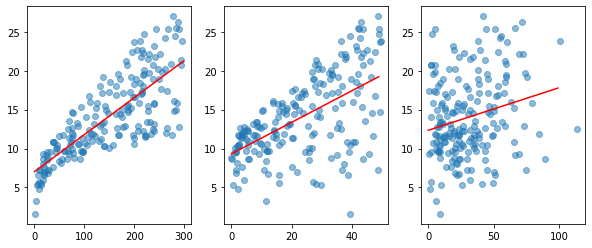

In [ ]:
#Plotting the Sales and Other Predictors
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(10,4),facecolor='white')

ax1.scatter('TV','Sales',data=data,alpha=0.5)
x1=np.arange(300) #Interval Shown in the Plot
m1,b1=np.polyfit(x=data.TV,y=data.Sales,deg=1)
y1=m1*x1+b1
ax1.plot(x1,y1,color='red')
ax1.set_xlabel=('TV')
ax1.set_ylabel=('Sales')

ax2.scatter('Radio','Sales',data=data,alpha=0.5)
x2=np.arange(50) #Interval Shown in the Plot
m2,b2=np.polyfit(x=data.Radio,y=data.Sales,deg=1)
y2=m2*x2+b2
ax2.plot(x2,y2,color='red')
ax2.set_xlabel=('radio')
ax2.set_ylabel=('Sales')

ax3.scatter('Newspaper','Sales',data=data,alpha=0.5)
x3=np.arange(100) #Interval Shown in the Plot
m3,b3=np.polyfit(x=data.Newspaper,y=data.Sales,deg=1)
y3=m3*x3+b3
ax3.plot(x3,y3,color='red')
ax3.set_xlabel=('Newspaper')
ax3.set_ylabel=('Sales')

### **2.2 Putting R Code in Python**

#### **2.2.1 Basic Commands**

In [ ]:
x=np.array([5,7,4])
print(x)

[5 7 4]


In [ ]:
y=[9,3,7]
print(y)

[9, 3, 7]


In [ ]:
len(x)

3

In [ ]:
len(y)

3

In [ ]:
print(x+y)

[14 10 11]


In [ ]:
whos

Variable   Type           Data/Info
-----------------------------------
ad_url     str            https://raw.githubusercon<...>r/Dataset/Advertising.csv
ax1        AxesSubplot    AxesSubplot(0.125,0.125;0.227941x0.755)
ax2        AxesSubplot    AxesSubplot(0.398529,0.125;0.227941x0.755)
ax3        AxesSubplot    AxesSubplot(0.672059,0.125;0.227941x0.755)
b1         float64        7.0325935491276965
b2         float64        9.311638095158278
b3         float64        12.351407069278167
data       DataFrame              TV  Radio  Newspa<...>n\n[200 rows x 4 columns]
fig        Figure         Figure(720x288)
m1         float64        0.04753664043301974
m2         float64        0.20249578339243984
m3         float64        0.054693098472273174
np         module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module         <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt        module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>

#### **2.2.2 Graphics**

In [ ]:
a=np.random.normal(0,1,100)
b=np.random.normal(0,1,100)

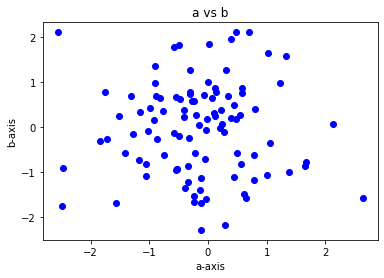

In [ ]:
#Plotting random normalized number 'a' & 'b'
plt.figure(facecolor='white')
plt.plot(a,b,'bo')
plt.xlabel("a-axis")
plt.ylabel("b-axis")
plt.title("a vs b")
plt.show()

In [ ]:
x=np.arange(1,11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
x=np.arange(1,11,2)
print(x)

[1 3 5 7 9]


In [ ]:
print(np.arange(0.2,0.6,0.4))

[0.2]


In [ ]:
print(np.arange(0.2,1.6,1.4))

[0.2 1.6]


In [ ]:
#Math function in Python | Documentation: https://docs.python.org/3/library/math.html
#import math

In [ ]:
#Colormaps library and Matlab library in Python
import matplotlib.cm as cm
import matplotlib.mlab as mlab
b=a
A,B=np.meshgrid(a,b)

In [ ]:
whos

Variable   Type           Data/Info
-----------------------------------
A          ndarray        100x100: 10000 elems, type `float64`, 80000 bytes
B          ndarray        100x100: 10000 elems, type `float64`, 80000 bytes
a          ndarray        100: 100 elems, type `float64`, 800 bytes
ad_url     str            https://raw.githubusercon<...>r/Dataset/Advertising.csv
ax1        AxesSubplot    AxesSubplot(0.125,0.125;0.227941x0.755)
ax2        AxesSubplot    AxesSubplot(0.398529,0.125;0.227941x0.755)
ax3        AxesSubplot    AxesSubplot(0.672059,0.125;0.227941x0.755)
b          ndarray        100: 100 elems, type `float64`, 800 bytes
b1         float64        7.0325935491276965
b2         float64        9.311638095158278
b3         float64        12.351407069278167
cm         module         <module 'matplotlib.cm' f<...>ckages/matplotlib/cm.py'>
data       DataFrame              TV  Radio  Newspa<...>n\n[200 rows x 4 columns]
fig        Figure         Figure(720x288)
m1         flo

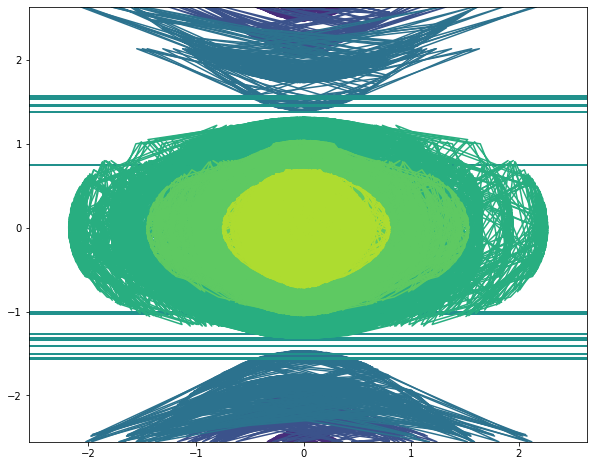

In [ ]:
f=np.cos(B)/(1+np.square(A))
plt.figure(figsize=(10,8),facecolor='white')
CS=plt.contour(A,B,f)
plt.show()

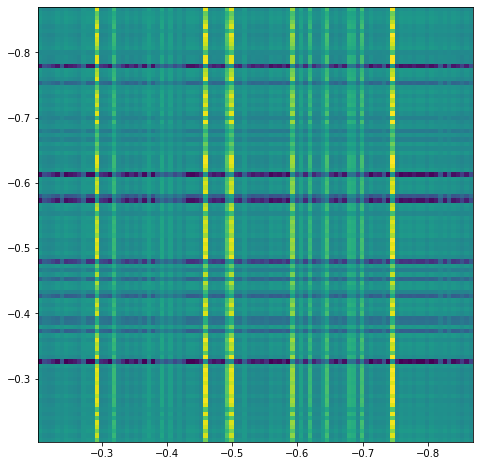

In [ ]:
fa=(f-f.T)/2 #f.T is the transposed f
plt.figure(figsize=(10,8),facecolor='white')
plt.imshow(fa,extent=(a[0],a[-1],b[0],b[-1]))
plt.show()

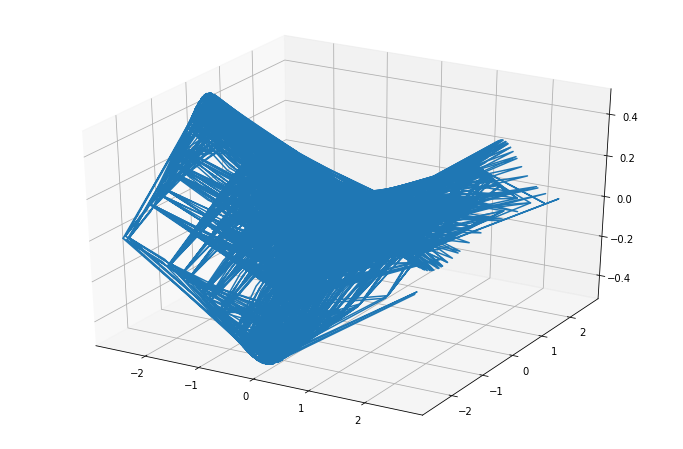

In [ ]:
#3D Plotting using mplot3d
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure(figsize=(12,8),facecolor='white')
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(A,B,fa)
plt.show()

#### **2.2.3 Indexing Data**

In [ ]:
#Create a matrix
matrix=np.arange(1,26,1).reshape(5,5).transpose()
matrix

array([[ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24],
       [ 5, 10, 15, 20, 25]])

In [ ]:
#Selecting element in the matrix
matrix[0,0] #First row first column

1

In [ ]:
matrix[[[0],[2]],[1,3]]

array([[ 6, 16],
       [ 8, 18]])

In [ ]:
matrix[0:3:1,1:4:1]

array([[ 6, 11, 16],
       [ 7, 12, 17],
       [ 8, 13, 18]])

In [ ]:
matrix[0:2,:]

array([[ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22]])

In [ ]:
matrix[:,0:2]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

### **2.3 Graphical and Numerical Summaries of Auto.csv Dataset**



In [ ]:
#Importing the data
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url)

In [ ]:
auto.sample(n=10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
184,25.0,4,140.0,92,2572,14.9,76,1,capri ii
113,21.0,6,155.0,107,2472,14.0,73,1,mercury capri v6
206,26.5,4,140.0,72,2565,13.6,76,1,ford pinto
144,31.0,4,76.0,52,1649,16.5,74,3,toyota corona
125,20.0,6,198.0,95,3102,16.5,74,1,plymouth duster
291,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw)
227,19.0,6,225.0,100,3630,17.7,77,1,plymouth volare custom
197,29.0,4,90.0,70,1937,14.2,76,2,vw rabbit
363,22.4,6,231.0,110,3415,15.8,81,1,buick century
333,32.7,6,168.0,132,2910,11.4,80,3,datsun 280-zx


In [ ]:
#Checking the variables in the dataset
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [ ]:
#Checking the variables in the dataset can also be done like this:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
#Summary statistics of the dataset
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#Checking the Unique Values in the Dataset
columns=auto.columns

for i in columns:
  col_uniques=np.unique(auto[i].values)
  print("The number of unique value in column", "'",i,"'", "is: ",len(col_uniques))
  if len(col_uniques)==2:
    print("The unique values in column", "'",i,"'", "is boolean (0 or 1)")

The number of unique value in column ' mpg ' is:  129
The number of unique value in column ' cylinders ' is:  5
The number of unique value in column ' displacement ' is:  82
The number of unique value in column ' horsepower ' is:  94
The number of unique value in column ' weight ' is:  350
The number of unique value in column ' acceleration ' is:  95
The number of unique value in column ' year ' is:  13
The number of unique value in column ' origin ' is:  3
The number of unique value in column ' name ' is:  304


Now, let's try to find out what are the values for columns that has less than 20 unique values

In [ ]:
cyl=np.unique(auto['cylinders'].values)
cyl

array([3, 4, 5, 6, 8])

In [ ]:
year=np.unique(auto['year'].values)
year

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
origin=np.unique(auto['origin'].values)
origin

array([1, 2, 3])

So, we can now know the unique values in each variable (column).

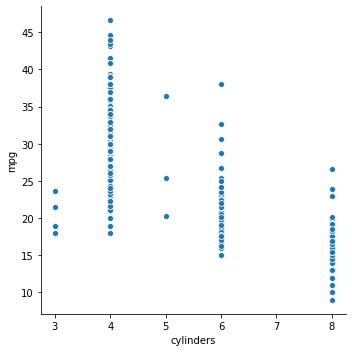

In [ ]:
#Let's try plotting the cylinders columns
plt.rcParams['figure.facecolor']='white'
sns.relplot(x='cylinders',y='mpg',data=auto)

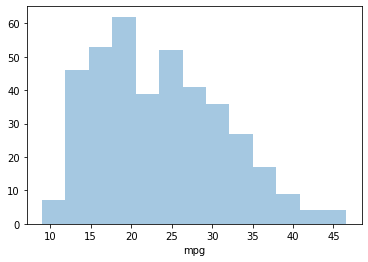

In [ ]:
#Making histogram for the mpg column (Miles per Gallon data)
plt.rcParams['figure.facecolor']='white'
sns.distplot(auto.mpg,kde=False)

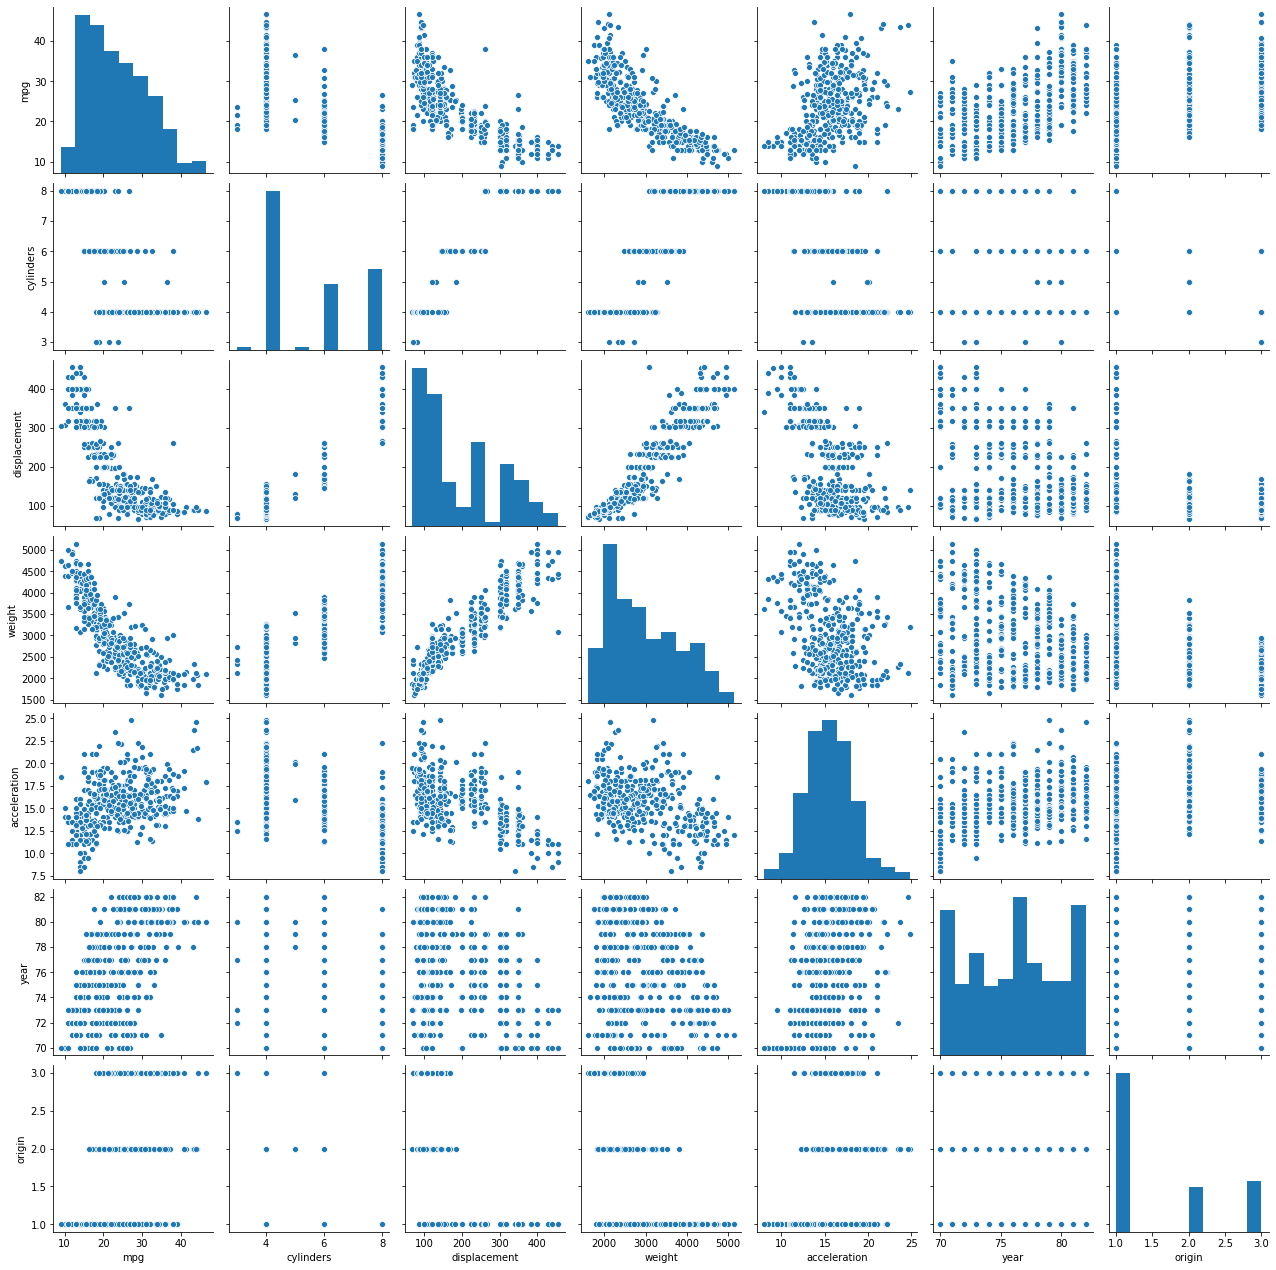

In [ ]:
#Making pairplot to see the relationship between columns
plt.rcParams['figure.facecolor']='white'
sns.pairplot(auto)

### **2.4 Applied Statistical Learning**
***Exercise Section "Applied" No.8"***

This exercise relates to the **College.csv** dataset containing a number of variables for 777 different universities and colleges in the US.


In [ ]:
#Importing the Data
col_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/College.csv"
college=pd.read_csv(col_url)
college.sample(n=10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
386,Moravian College,Yes,1232,955,303,23,58,1241,485,14990,4730,550,1250,86,92,15.2,28,9566,74
93,Catawba College,Yes,1083,880,291,13,34,915,80,9270,4100,600,1860,75,82,13.5,27,8425,55
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99
51,Bethel College KS,Yes,202,184,122,19,42,537,101,8540,3580,500,1400,61,80,8.8,32,8324,56
89,Carson-Newman College,Yes,1096,951,464,27,62,1776,239,8150,3150,400,500,61,62,13.6,16,6716,67
480,Rollins College,Yes,1777,1151,382,31,55,1668,1052,16425,5220,955,750,81,85,13.3,23,11561,90
266,Illinois Benedictine College,Yes,607,558,269,22,47,1222,519,10500,4348,650,1500,81,91,11.6,29,8324,75
339,Manhattanville College,Yes,962,750,212,21,54,830,150,14700,6550,450,400,97,97,11.3,24,11291,70
136,College of St. Scholastica,Yes,672,596,278,29,60,1350,275,11844,3696,450,1146,54,76,11.6,33,8996,72
112,Christopher Newport University,No,883,766,428,3,37,2910,1749,7860,4750,525,1889,80,82,21.2,16,4639,48


In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
#Checking the Unique Values in the Dataset
columns=college.columns

for i in columns:
  col_uniques=np.unique(college[i].values)
  print("The number of unique value in column", "'",i,"'", "is: ",len(col_uniques))
  if len(col_uniques)==2:
    print("The unique values in column", "'",i,"'", "is boolean (0 or 1)")

The number of unique value in column ' Unnamed: 0 ' is:  777
The number of unique value in column ' Private ' is:  2
The unique values in column ' Private ' is boolean (0 or 1)
The number of unique value in column ' Apps ' is:  711
The number of unique value in column ' Accept ' is:  693
The number of unique value in column ' Enroll ' is:  581
The number of unique value in column ' Top10perc ' is:  82
The number of unique value in column ' Top25perc ' is:  89
The number of unique value in column ' F.Undergrad ' is:  714
The number of unique value in column ' P.Undergrad ' is:  566
The number of unique value in column ' Outstate ' is:  640
The number of unique value in column ' Room.Board ' is:  553
The number of unique value in column ' Books ' is:  122
The number of unique value in column ' Personal ' is:  294
The number of unique value in column ' PhD ' is:  78
The number of unique value in column ' Terminal ' is:  65
The number of unique value in column ' S.F.Ratio ' is:  173
The nu

It is seen in the cell above, the column 'Private' contains the information whether the university is private university or not. Let's see how many of them in the data:

In [ ]:
college['Private'].value_counts(dropna=False)

Yes    565
No     212
Name: Private, dtype: int64

It is turned out that there are 565 private universities and 212 non-private universities

In [ ]:
#Convert the value Yes to '0' and No to '1'
college['Private']=pd.factorize(college.Private)[0]
college.Private.value_counts()

0    565
1    212
Name: Private, dtype: int64

In [ ]:
#Now the value Yes and No in the 'Private' column became 0 and 1
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#Naming the first column as "University"
college=college.rename(columns={"Unnamed: 0":"University"}) 
college.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    int64  
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
#Create 'Elite' column by binning the 'Top10perc' variable
college['Elite']=['Yes' if x>50 else 'No' for x in college['Top10perc']]
college.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Agnes Scott College,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


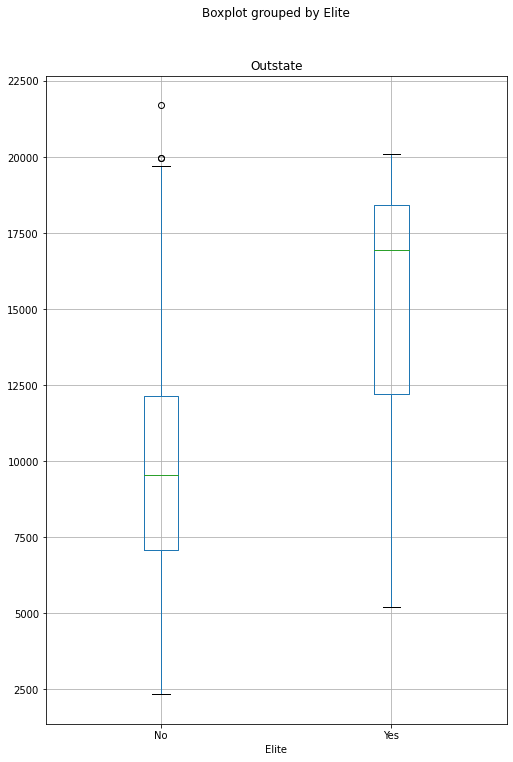

In [ ]:
#Side-by-side Boxplot
plt.rcParams['figure.facecolor']='white'
college.boxplot(column='Outstate',by='Elite',figsize=(8,12))
plt.show()

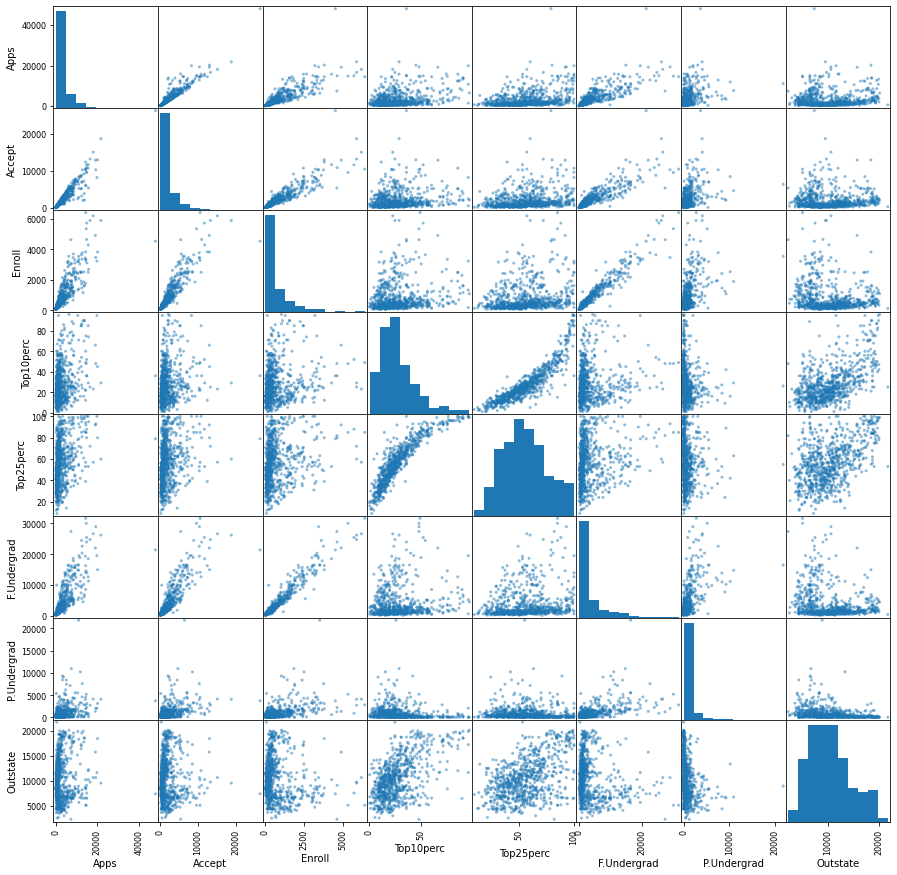

In [ ]:
#Create Scatter Plots using Columns #2 to 9# (column 'Apps' to 'Outstate')
plt.rcParams['figure.facecolor']='white'
fig=pd.plotting.scatter_matrix(college.iloc[:,2:10],figsize=(15,15))
plt.show()

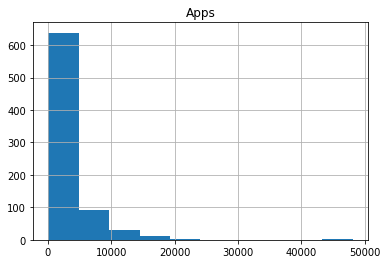

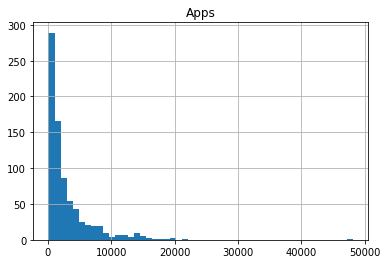

In [ ]:
#Creating Histrogram
#plt.figure(figsize=(6,10),facecolor='white')
plt.rcParams['figure.facecolor']='white'
college.hist(column='Apps')
college.hist(column='Apps',bins=50)
plt.show()

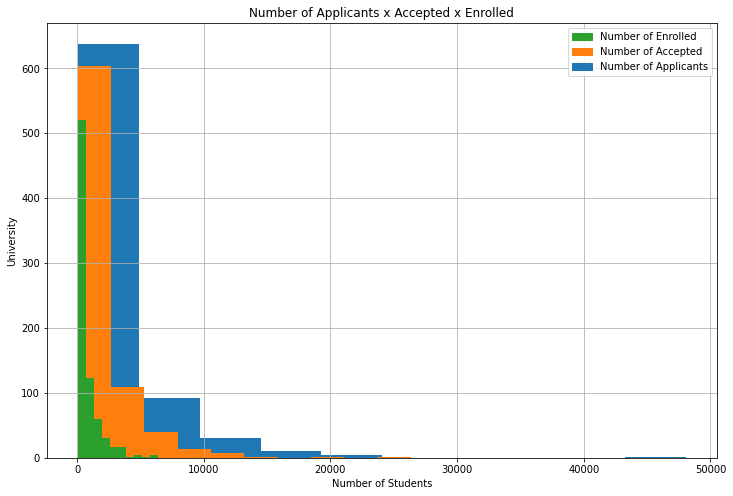

In [ ]:
import matplotlib.patches as mpatches #Library for creating patch legends

plt.figure(figsize=(12,8),facecolor='white')
plt.title('Number of Applicants x Accepted x Enrolled')
plt.xlabel('Number of Students')
plt.ylabel('University')
college['Apps'].hist(bins=10)
college['Accept'].hist(bins=10)
college['Enroll'].hist(bins=10)

#Creates Lagends
green=mpatches.Patch(color='tab:green',label='Number of Enrolled')
orange=mpatches.Patch(color='tab:orange',label='Number of Accepted')
blue=mpatches.Patch(color='tab:blue',label='Number of Applicants')
plt.legend(handles=[green,orange,blue])

plt.show()

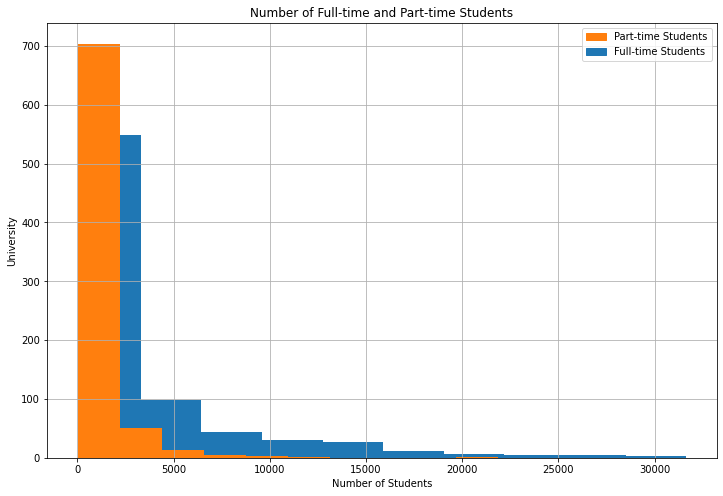

In [ ]:
plt.figure(figsize=(12,8),facecolor='white')
plt.title('Number of Full-time and Part-time Students')
plt.xlabel('Number of Students')
plt.ylabel('University')
college['F.Undergrad'].hist(bins=10)
college['P.Undergrad'].hist(bins=10)

#Creates Lagends
orange=mpatches.Patch(color='tab:orange',label='Part-time Students')
blue=mpatches.Patch(color='tab:blue',label='Full-time Students')
plt.legend(handles=[orange,blue])

plt.show()

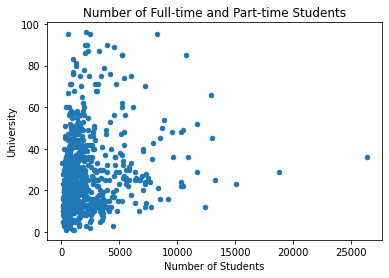

In [ ]:
#Scatter Plot of Accepted Students and Top10perc
#fig,ax=plt.figure(figsize=(12,8),facecolor='white')
plt.rcParams['figure.facecolor']='white'
college.plot.scatter(x='Accept',y='Top10perc')
plt.title('Number of Full-time and Part-time Students')
plt.xlabel('Number of Students')
plt.ylabel('University')
plt.show()

In [ ]:
#Creating 'Accept_rate' variable
college['Accept_rate']=college['Accept']/college['Apps']

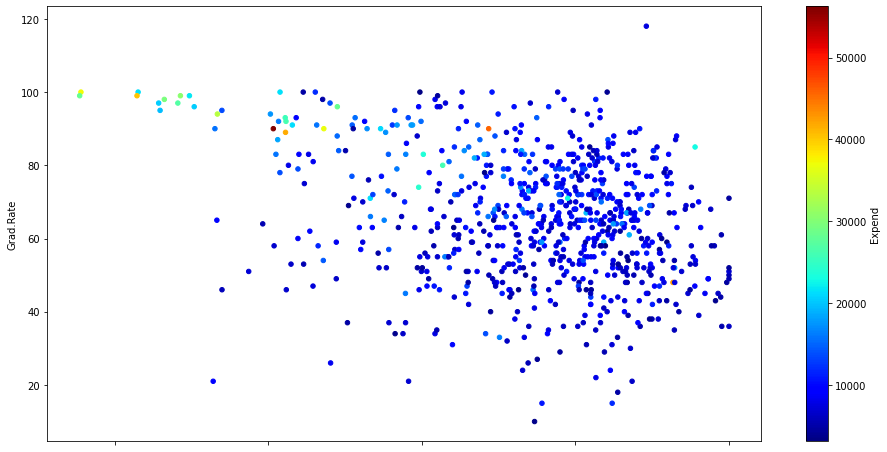

In [ ]:
#plt.figure(figsize=(16,8),facecolor='white')
plt.rcParams['figure.facecolor']='white'
college.plot.scatter(x='Accept_rate',y='Grad.Rate',c='Expend',colormap='jet',figsize=(16,8))
plt.show()

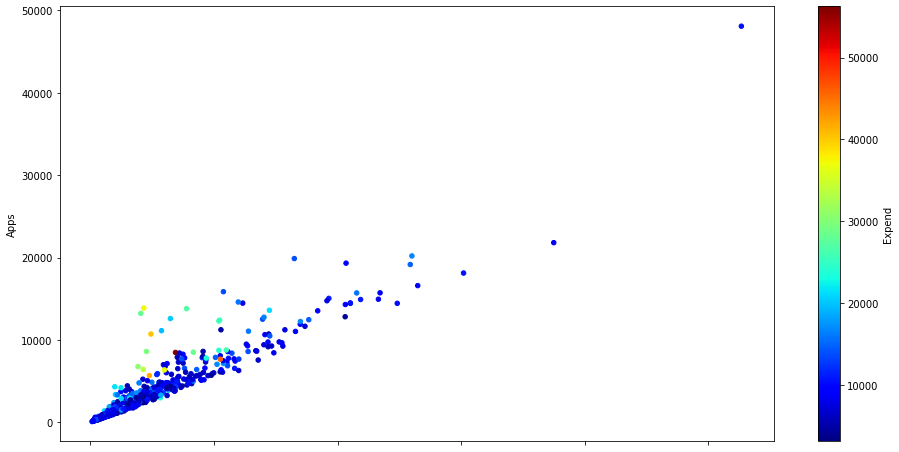

In [ ]:
plt.rcParams['figure.facecolor']='white'
college.plot.scatter(x='Accept',y='Apps',c='Expend',colormap='jet',figsize=(16,8))
plt.show()

### **2.5 Exercises P.71 PDF**

#### **No.9 Auto Dataset**

In [ ]:
df=pd.read_csv(auto_url,na_values='?')
df.sample(n=10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
42,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw)
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
35,17.0,6,250.0,100.0,3329,15.5,71,1,chevrolet chevelle malibu
161,16.0,6,250.0,105.0,3897,18.5,75,1,chevroelt chevelle malibu
20,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
283,20.2,6,232.0,90.0,3265,18.2,79,1,amc concord dl 6
361,25.4,6,168.0,116.0,2900,12.6,81,3,toyota cressida
91,13.0,8,400.0,150.0,4464,12.0,73,1,chevrolet caprice classic
172,25.0,4,90.0,71.0,2223,16.5,75,2,volkswagen dasher


In [ ]:
#Checking missing values ('?')
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Let's drop the 5 rows which contain missing values

In [ ]:
df=df.dropna()
df.shape

(392, 9)

**(a) Which of the predictors are quantitative, and which are qualitative?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


We can categorize the columns into:
* Quantitative: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
* Qualitative: ['year','origin','name']

**(b) What is the range of each quantitative predictor?**

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


We can see the range of each quantitative predictors in the table above by referring to each column's max and min values

In [ ]:
df.describe().loc[['min','max']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0


**(c) What is the mean and standard deviation of each quantitative predictor?**

In [ ]:
df.describe().loc[['mean','std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518


**(d) Removing 10th to 85th observations and see the new range, mean, and standard deviation!**

In [ ]:
df_new=df.drop(df.index[9:85])
df_new.shape

(316, 9)

In [ ]:
df_new.describe().loc[['min','max','mean','std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910


**(e) Using the full dataset, investigate the predictors graphically, using scatterplots or other visualization.**

**(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg?**

#### **No.10 Boston Housing Dataset**

In [ ]:
house=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
house.sample(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,20.2
333,0.05083,0.0,5.19,0,0.515,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
408,7.40389,0.0,18.10,0,0.597,5.617,97.9,1.4547,24,666,20.2,314.64,26.40,17.2
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0


**(a) How many rows are in this data set? How many columns? What do the rows and columns represent?**

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**(b) Pairwise Scatter Plot**

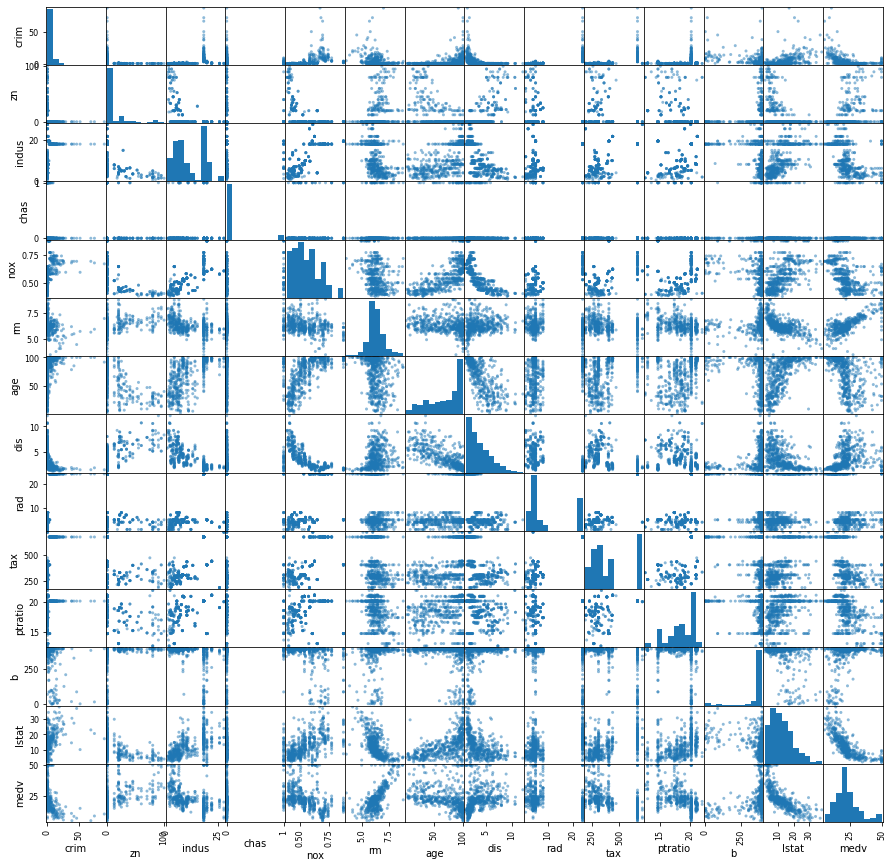

In [ ]:
plt.rcParams['figure.facecolor']='white'
pd.plotting.scatter_matrix(house,figsize=(15,15))
plt.show()

**(c) Are any of the variables associated with per capite crime rate?**

**(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?**

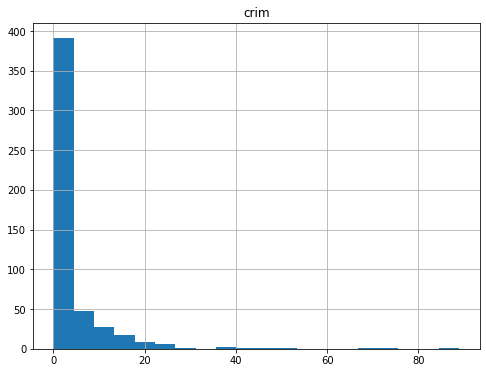

In [ ]:
plt.rcParams['figure.facecolor']='white'
house.hist(column='crim',bins=20,figsize=(8,6))
plt.show()

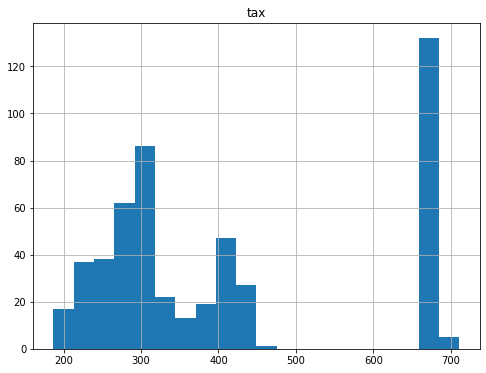

In [ ]:
plt.rcParams['figure.facecolor']='white'
house.hist(column='tax',bins=20,figsize=(8,6))
plt.show()

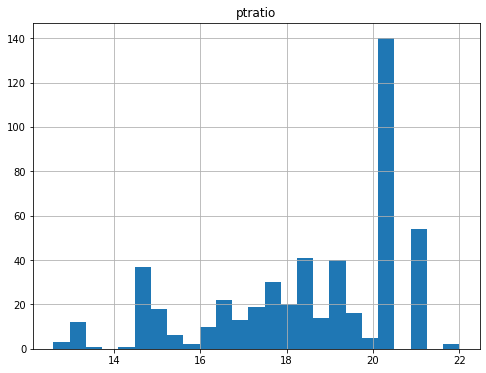

In [ ]:
plt.rcParams['figure.facecolor']='white'
house.hist(column='ptratio',bins=25,figsize=(8,6))
plt.show()

**(e) How many of the suburbs in this data set bound the Charles river?**
In this dataset, column CHAS contains the data that indicates whether the suburb bounds to the Charles River
* 1: bounds river
* 0: otherwise

In [ ]:
bound=house.chas.value_counts(normalize=True)
bound

0    0.93083
1    0.06917
Name: chas, dtype: float64

It can be seen in the result above, that 93.083% suburbs ARE NOT bound to the Charles river, and 6.917% of them ARE.

**(f) What is the median pupil-teacher ratio among the towns in this data set?**

In [ ]:
house['ptratio'].median()

19.05

**(g) Which suburb of Boston has lowest median value of owner-occupied homes (MEDV)? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors?**

In [ ]:
house['medv'].min()

5.0

In [ ]:
#For the suburbs with medv=5, find out their conditions!
lowestmedvsuburbs=house.loc[house['medv']==5]
lowestmedvsuburbs

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


It is turned out that only 2 suburbs has lowest medv value and those are their conditions.

In [ ]:
#FASTER WAY:
lowestmedvsuburbs=house[house['medv']==min(house['medv'])]
lowestmedvsuburbs

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


**(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling**

In [ ]:
sevenrooms=house.loc[house.rm>7]
sevenrooms.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0


In [ ]:
sevenrooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,388.275156,5.474063,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,9.487005,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,354.310000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,384.922500,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,390.660000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,395.305000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,396.900000,16.740000,50.000000


In [ ]:
(house['rm']>7).sum()

64

In [ ]:
eightrooms=house.loc[house.rm>8]
eightrooms.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0


In [ ]:
eightrooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [ ]:
(house['rm']>8).sum()

13